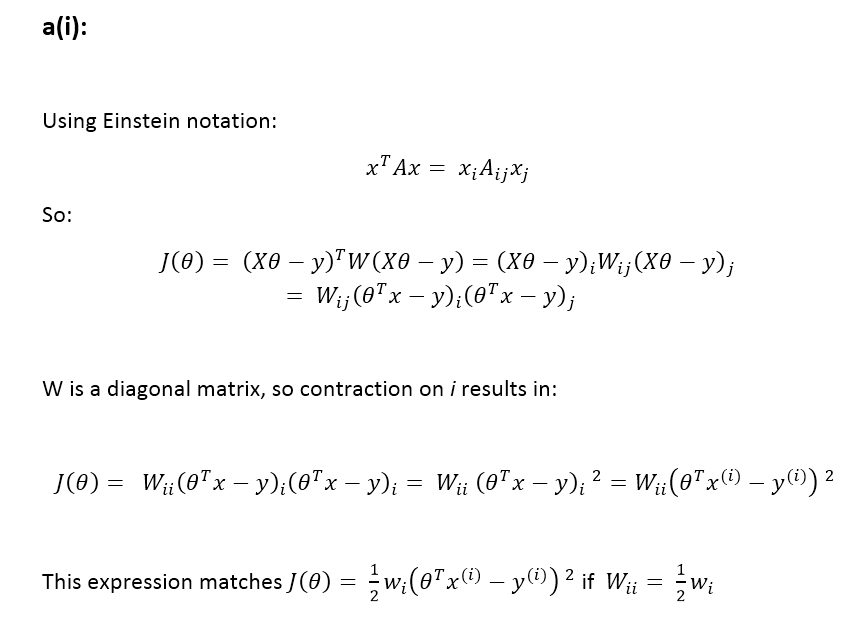

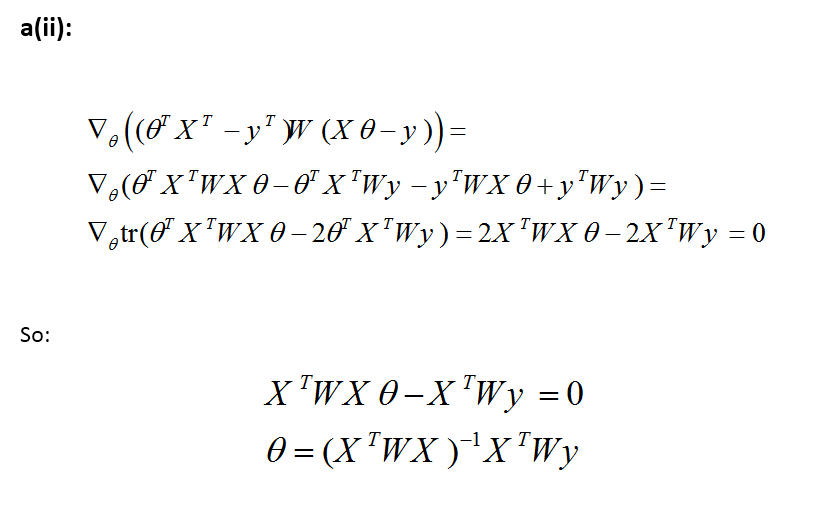

<font size="5">b(i)</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('quasar_train.csv')

In [2]:
df.head(3)

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
1,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
2,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924


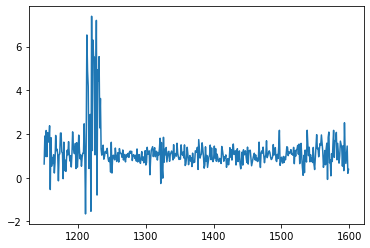

In [3]:
test_matrix = df.to_numpy()
x = df.columns.astype(float).to_numpy()
y = test_matrix[0]
plt.plot(x,y)
plt.show()

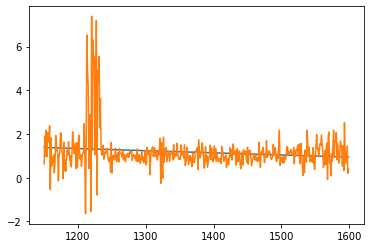

In [4]:
x=x.reshape(450,1)
y=y.reshape(450,1)
one = np.ones(x.shape[0]).reshape(1,450)
xx = np.vstack((one,x.T))
X=xx.T
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
Y_predcited = X.dot(theta)
plt.plot(x,Y_predcited)
plt.plot(x,y)
plt.show()

<font size="5">b(ii)</font>

In [5]:
def construct_weight_matrix(X, x_eval, tau=5):
    return np.diag(np.exp(- (X[:,1] - x_eval[1]) **2 / (2 * tau ** 2)))

def optim(X, y, W=None):
    if W is None:
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    else:
        return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(y)

x0 = np.ones(df.shape[1])
x1 = df.columns.astype(float).to_numpy()
y = df.head(1).values.ravel()
X = np.stack([x0, x1]).T

res = []
preds = []
for k, x_eval in enumerate(X):
    W = construct_weight_matrix(X, x_eval)
    theta = optim(X, y, W)
    preds.append(theta.dot(x_eval))
preds

[1.3545775099561261,
 1.4114280002252209,
 1.4441829121191887,
 1.45448324247797,
 1.4446480448542616,
 1.4176791548593215,
 1.3771806260617652,
 1.3271938553976952,
 1.2719639913182874,
 1.2156651634720745,
 1.1621182409063309,
 1.114534476799733,
 1.0753135189558165,
 1.0459177451418498,
 1.0268375197816653,
 1.0176514301254072,
 1.0171696989973449,
 1.0236310385200547,
 1.0349126825717025,
 1.0487193030999116,
 1.0627388274140461,
 1.0747799380590362,
 1.0829204178530967,
 1.0856866288216915,
 1.0822546792544507,
 1.072628248741422,
 1.0577265170620969,
 1.0393226395267199,
 1.0198100786954925,
 1.0018278621169152,
 0.9878249006102546,
 0.9796674178196474,
 0.9783820931583174,
 0.9840850245628285,
 0.9960897416770926,
 1.0131378939510505,
 1.0336714096472726,
 1.0560713118148755,
 1.0788194416171777,
 1.100579237573264,
 1.120222831739973,
 1.1368425251548047,
 1.149774410965236,
 1.1586398225388468,
 1.163390291714951,
 1.1643348893581742,
 1.162137899260979,
 1.1577931738438005,
 

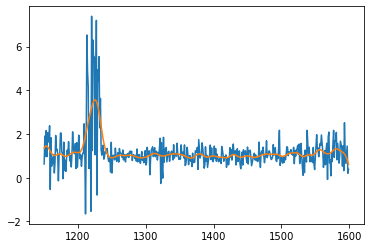

In [6]:
plt.plot(x1, df.loc[0].values)
plt.plot(x1, preds)

<font size="5">c(i)</font>

In [7]:
x_values = df.columns.astype(float).to_numpy().reshape(450,1)
y_1 = df.iloc[0].to_numpy()
Y = df.to_numpy()
one = np.ones(x_values.shape[0]).reshape(1,450)
X = np.vstack((one,x_values.T)).T

#theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_1)
tau = 5
pred = []
Pred = []
for row in range(Y.shape[0]):
    pred = []
    for i in range(x_values.shape[0]):
        W = np.diag(np.exp(- (X[:,1] - x_values[i]) **2 / (2 * tau ** 2)))
        theTa = np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y[row])
        pred.append(X[i,:].dot(theTa))
    Pred.append(pred)

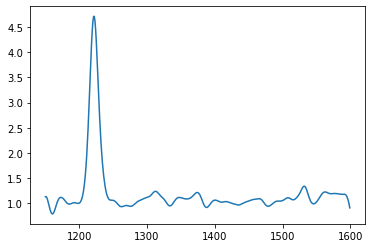

In [8]:
plt.plot(x_values,Pred[100])

<font size="5">c(ii)</font>

In [10]:
import pandas as pd
below_Lyman = df.columns.astype(float).to_list().index(1200)
above_Lyman= df.columns.astype(float).to_list().index(1300)

Pred_to_DF = pd.DataFrame(Pred)
df_left = df.iloc[:,0:below_Lyman]
df_right = df.iloc[:,above_Lyman:]

f_l = df_left.values.tolist()
f_r= df_right.values.tolist()

#if right:
 #   f1 = f1[0:below_Lyman]
  #  f2 = f2[0:below_Lyman]
#else:
  #  f1 = f1[above_Lyman:]   
   # f2 = f2[above_Lyman:]  

def d_metric(f1,f2):
    
    arr_f1 = np.array(f1)
    arr_f2 = np.array(f2)     
    d = sum((arr_f1-arr_f2)**2)
    return d

def ker(t):
    return max(1-t,0)

def h(f):
    emp_list =[]
    for i in range(200):
        emp_list.append(d_metric(f,f_r[i]))
    return max(emp_list)

def K_neighbours(f,k):
    lst_d_metric = []
    for i in range(200):
        lst_d_metric.append(d_metric(f,f_r[i]))
    indices = [index for index, value in sorted(enumerate(lst_d_metric), key=lambda x: x[1])][1:k+1]
    return indices 

In [11]:
reg_fun = []
for spec in range(50):
    num= []
    den = []
    f_left = []
    for lambdda in range(len(f_l[0])):
        for neighb in K_neighbours(f_r[spec],3):
            num.append(ker(d_metric(f_r[neighb],f_r[spec])/h(f_r[spec]))*f_l[neighb][lambdda])
            den.append(ker(d_metric(f_r[neighb],f_r[spec])/h(f_r[spec])))
        f_left.append(sum(num) / sum(den))
    reg_fun.append(f_left)

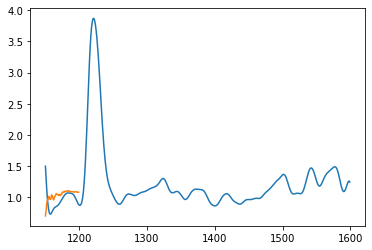

In [12]:
plt.plot(x_values,Pred[20])
plt.plot(df.columns.astype(float).to_list()[:50],reg_fun[20])